## Agglomerative Clustering

Using the generated proximity matrix, we cluster points based on the distance between the points and/or centroids of the clusters. The linkage used here is Centroid Linkage.

#### Using 10 by 10 Proximity Matrix to Demonstrate Clustering

* Load the Proximity Matrix for the csv file
* Convert all individual points into clusters containing the points themselves. All clusters have 1 point each in them now.
* Find the Centroid of each cluster
* Iterate through all distances between centroids/points and find the minimum distance and corresponding pair of clusters/points.
* Merge the clusters/points and delete the individual points. Update the centroid also.
* Repeat the process till number of specified clusters is reached.



In [6]:
import csv
import numpy as np

def load_proximity_matrix(filename, subset_size=100):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        matrix = np.array([list(map(float, row[:subset_size])) for row in list(reader)[:subset_size]])
    return matrix

def initialize_clusters(n):
    return [[i] for i in range(n)], np.eye(n)

def compute_centroid(cluster, proximity_matrix):
    return np.mean(proximity_matrix[cluster], axis=0)

#Centroid Linkage
def centroid_linkage(centroids):
    min_dist = float('inf')
    pair = None
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            dist = np.linalg.norm(centroids[i] - centroids[j])
            if dist < min_dist:
                min_dist = dist
                pair = (i, j)
    return pair

#Merge Clusters and Update Centroid
def merge_and_update(clusters, centroids, pair, proximity_matrix):
    i, j = pair
    new_cluster = clusters[i] + clusters[j]
    clusters.pop(j)
    clusters.pop(i)
    clusters.append(new_cluster)

    new_centroid = compute_centroid(new_cluster, proximity_matrix)
    centroids = np.delete(centroids, [i, j], axis=0)
    centroids = np.vstack([centroids, new_centroid])

    return clusters, centroids

#Agglomerative Clustering
def agglomerative_clustering(proximity_matrix, n_clusters):
    n = len(proximity_matrix)
    clusters, centroids = initialize_clusters(n)

    for i in range(n):
        centroids[i] = compute_centroid([i], proximity_matrix)

    while len(clusters) > n_clusters:
        pair = centroid_linkage(centroids)
        clusters, centroids = merge_and_update(clusters, centroids, pair, proximity_matrix)
        print("Current Clusters: ", clusters)

    
    return clusters

filename = 'output.csv'
subset_size = 10
proximity_matrix = load_proximity_matrix(filename, subset_size)

print('Proximity Matrix:')
print(proximity_matrix)

n_clusters = 1
final_clusters = agglomerative_clustering(proximity_matrix, n_clusters)



print("Final clusters:")
for cluster in final_clusters:
    print(cluster)


Proximity Matrix:
[[  0.           6.2139803   10.1019384   44.8407991  132.65615321
  155.86607883  54.28529672  99.0508312   41.67423774  36.97363489]
 [  6.2139803    0.          13.36185593  42.59909189 134.52386741
  157.66636098  55.90606524 100.54840815  39.77794598  35.10471682]
 [ 10.1019384   13.36185593   0.          54.2796418  123.09606453
  146.36019256  44.75639357  89.50828782  50.45136939  45.36812244]
 [ 44.8407991   42.59909189  54.2796418    0.         176.722
  200.05281792  97.63379263 142.81486006  10.46698339  15.86147335]
 [132.65615321 134.52386741 123.09606453 176.722        0.
   25.04117037  79.2523191   34.95708779 172.84590587 167.46801942]
 [155.86607883 157.66636098 146.36019256 200.05281792  25.04117037
    0.         102.9774404   57.63168206 196.17796349 190.68798083]
 [ 54.28529672  55.90606524  44.75639357  97.63379263  79.2523191
  102.9774404    0.          45.88168564  93.85964675  88.72418445]
 [ 99.0508312  100.54840815  89.50828782 142.814860

#### Using 100 by 100 Proximity Matrix Subset for Dendrogram

For plotting the dendrogram, inbuilt function is used. 100 initial cluster points are used because computing the distances of between 1 Million points (x20, if all time steps are considered) was computationally intensive and took > 1 hr

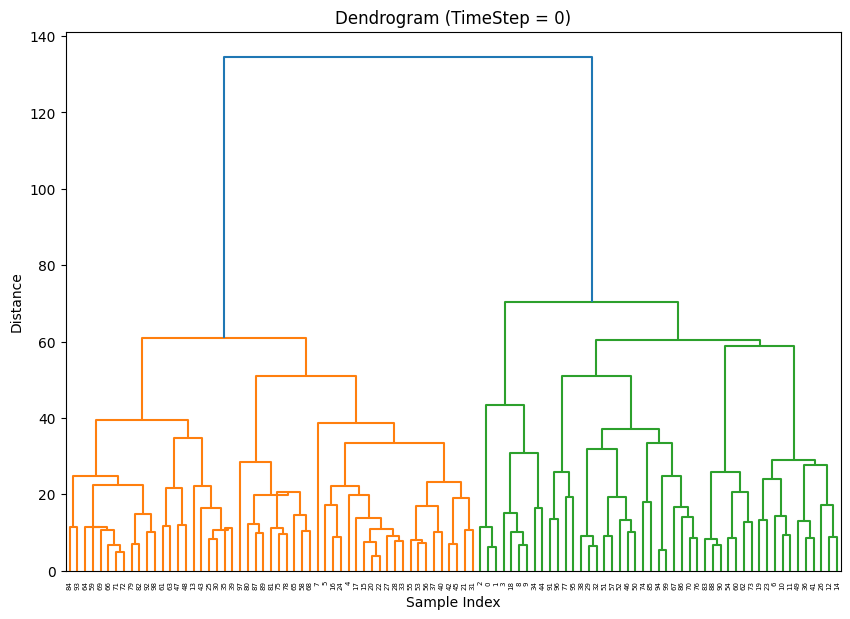

In [2]:
import csv
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

#Load the Proximity Matrix
def load_proximity_matrix(filename, subset_size=100):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        matrix = np.array([list(map(float, row[:subset_size])) for row in list(reader)[:subset_size]])
    return matrix

def proximity_to_condensed(matrix):
    # Only upper triangle is needed for dendrogram, without diagonal
    return sch.distance.squareform(matrix)

def generate_dendrogram(condensed_dist_matrix, method='centroid'):
    plt.figure(figsize=(10, 7))
    dendrogram = sch.dendrogram(sch.linkage(condensed_dist_matrix, method=method))
    plt.title('Dendrogram (TimeStep = 0)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

filename = 'output.csv'
subset_size = 100
proximity_matrix = load_proximity_matrix(filename, subset_size)
condensed_dist_matrix = proximity_to_condensed(proximity_matrix)

generate_dendrogram(condensed_dist_matrix, method='centroid')
